In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow import keras
import os
import shutil
from tensorflow.keras.utils import img_to_array
from sklearn.model_selection import train_test_split
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import Dropout
from keras.layers import Concatenate
from keras.layers import MaxPooling2D
from keras.layers import Conv2DTranspose
from keras.layers import UpSampling2D
from keras.optimizers import Adam
from keras.utils import to_categorical


from keras import Model
from keras.metrics import MeanIoU

C:\Users\21698\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
path = 'C:/Users/21698/OneDrive/Bureau/Omdena/breast_cancer/Dataset_BUSI_with_GT/'


Get index for images and masks

In [3]:
def num (image) :
    
    val = 0
    
    for i in range(len(image)) :
        if image[i] == '(' :
            while True :
                i += 1
                if image[i] == ')' :
                    break
                val = (val*10) + int(image[i])
            break
    
    return val

create an empy arrays

In [4]:
X_benign = np.zeros((437, 128, 128, 1))
y_benign = np.zeros((437, 128, 128, 1))
X_normal = np.zeros((133, 128, 128, 1))
y_normal = np.zeros((133, 128, 128, 1))
X_malignant = np.zeros((210, 128, 128, 1))
y_malignant = np.zeros((210, 128, 128, 1))

In [5]:
for i, tumor_type in enumerate(os.listdir(path)) :
    for image in os.listdir(path+tumor_type+'/') :
        p = os.path.join(path+tumor_type, image)
        img = cv2.imread(p,cv2.IMREAD_GRAYSCALE)           # read image as  grayscale
        
        if image[-5] == ')' :
            
            img = cv2.resize(img,(128,128))
            pil_img = Image.fromarray (img)
            
            if image[0] == 'b' :
                X_benign[num(image)-1]+= img_to_array(pil_img)  # If image is real add it
            if image[0] == 'n' :                           # to X as benign , normal
                X_normal[num(image)-1]+= img_to_array(pil_img)  # or malignant.
            if image[0] == 'm' :
                X_malignant[num(image)-1]+= img_to_array(pil_img)
        else :
            img = cv2.resize(img,(128,128))
            pil_img = Image.fromarray (img)
            
            if image[0] == 'b' :
                y_benign[num(image)-1]+= img_to_array(pil_img)  # Similarly add the target
            if image[0] == 'n' :                           # mask to y.
                y_normal[num(image)-1]+= img_to_array(pil_img)
            if image[0] == 'm' :
                y_malignant[num(image)-1]+= img_to_array(pil_img)

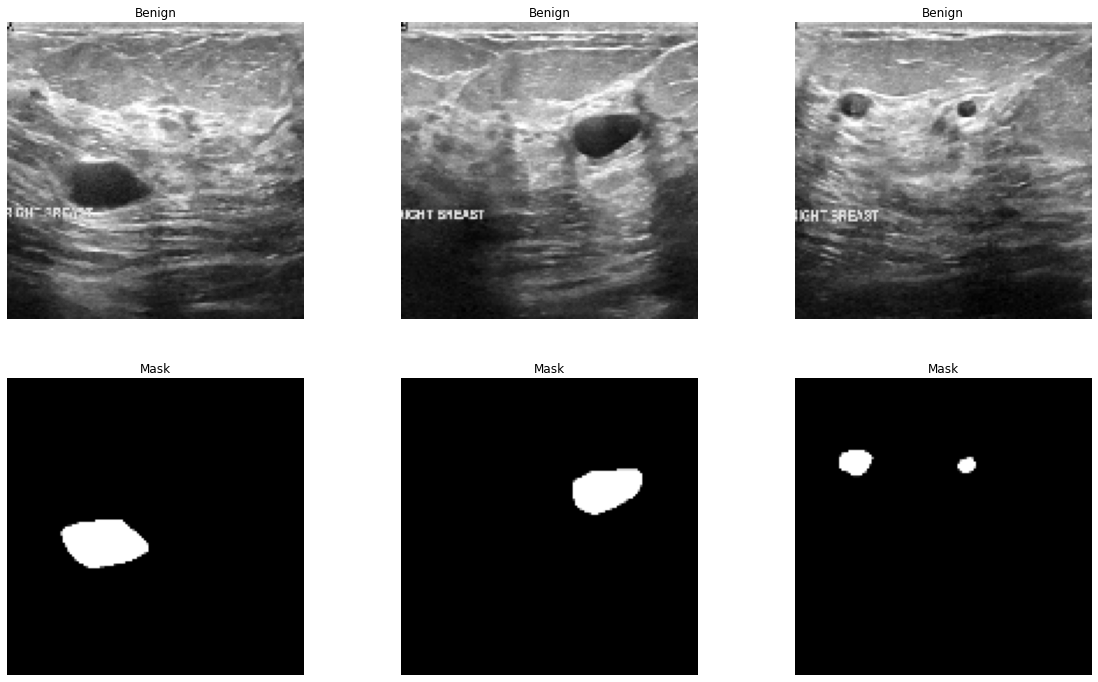

In [6]:
plt.figure(figsize = (20,12))

for i in range(3) :
    plt.subplot(2,3,i+1)
    plt.imshow(X_benign[i+1], 'gray')
    plt.title('Benign')
    plt.axis('off')

for i in range(3) :
    plt.subplot(2,3,i+4)
    plt.imshow(y_benign[i+1], 'gray')
    plt.title('Mask')
    plt.axis('off')
plt.show()

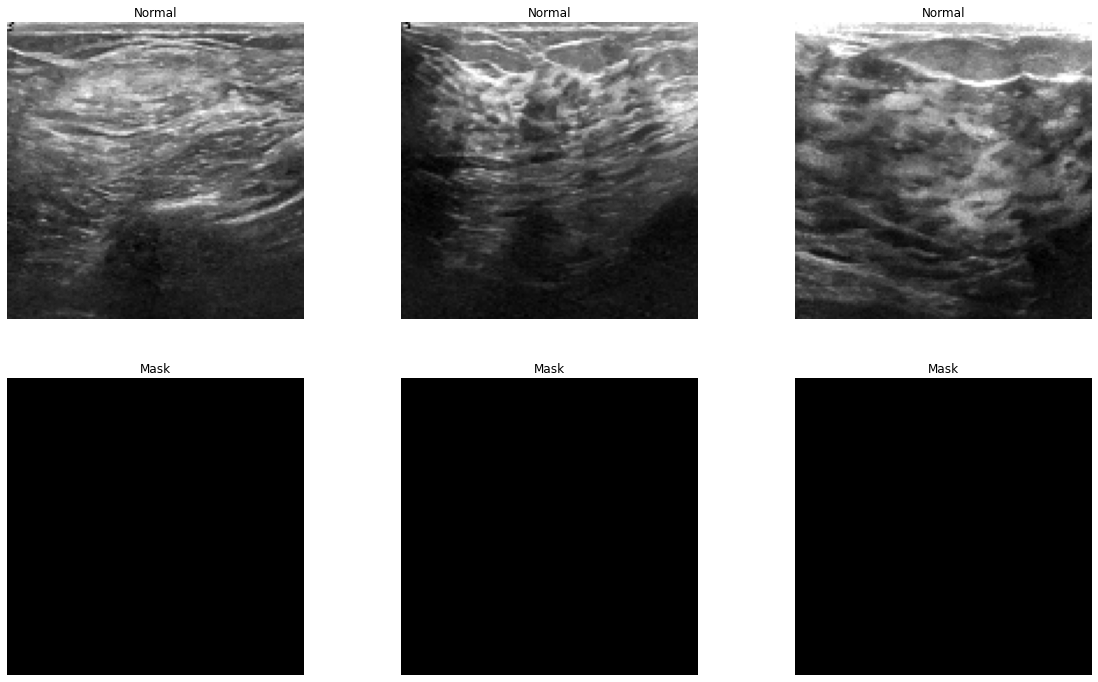

In [7]:
plt.figure(figsize = (20,12))

for i in range(3) :
    plt.subplot(2,3,i+1)
    plt.imshow(X_normal[i+1], 'gray')
    plt.title('Normal')
    plt.axis('off')

for i in range(3) :
    plt.subplot(2,3,i+4)
    plt.imshow(y_normal[i+1], 'gray')
    plt.title('Mask')
    plt.axis('off')
plt.show()

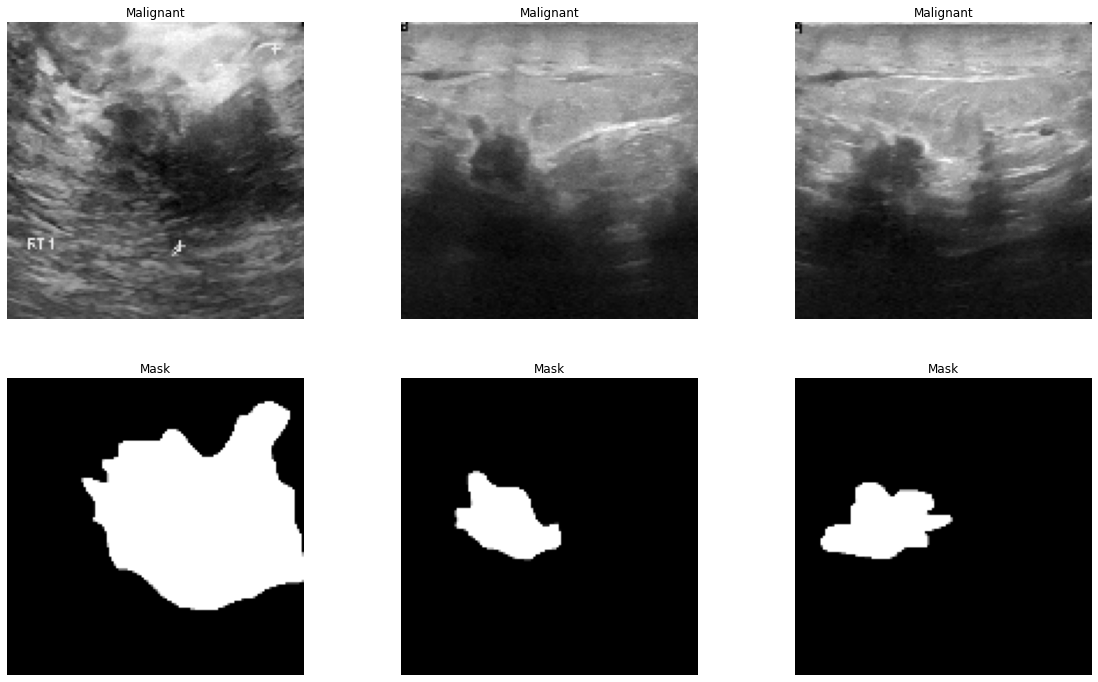

In [8]:
plt.figure(figsize = (20,12))

for i in range(3) :
    plt.subplot(2,3,i+1)
    plt.imshow(X_malignant[i+1], 'gray')
    plt.title('Malignant')
    plt.axis('off')

for i in range(3) :
    plt.subplot(2,3,i+4)
    plt.imshow(y_malignant[i+1], 'gray')
    plt.title('Mask')
    plt.axis('off')
plt.show()

In [9]:
print(X_malignant.shape)
print(X_normal.shape)
print(X_benign.shape)

(210, 128, 128, 1)
(133, 128, 128, 1)
(437, 128, 128, 1)


In [10]:
print(y_malignant.shape)
print(y_normal.shape)
print(y_benign.shape)

(210, 128, 128, 1)
(133, 128, 128, 1)
(437, 128, 128, 1)


In [11]:
X = (np.concatenate((X_benign, X_normal, X_malignant), axis = 0))/255
y = (np.concatenate((y_benign, y_normal, y_malignant), axis = 0))/255
print(X.shape)
print(y.shape)

(780, 128, 128, 1)
(780, 128, 128, 1)


In [12]:
print(X.max())
print(X.min())
print(y.max())
print(y.min())

1.0
0.0
2.0
0.0


In [13]:
y[y > 1.0] = 1.0

print(y.max())
print(y.min())

1.0
0.0


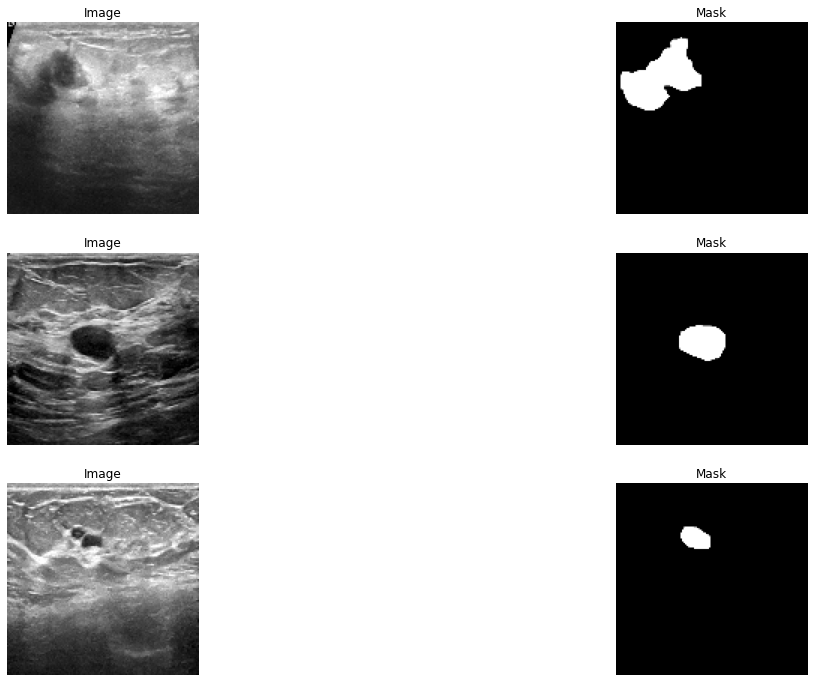

In [14]:
plt.figure(figsize = (20,12))
i = 0
while i < 6 :
    
    x = np.random.randint(0,780)
    
    plt.subplot(3,2,i+1)
    plt.imshow(X[x],'gray')
    plt.title('Image')
    plt.axis('off')
    
    plt.subplot(3,2,i+2)
    plt.imshow(y[x],'gray')
    plt.title('Mask')
    plt.axis('off')
    
    i += 2
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [16]:
print('X_train_shape:', X_train.shape)
print('y_train_shape', y_train.shape)
print('X_test_shape', X_test.shape)
print('y_test_shape', y_test.shape)

X_train_shape: (624, 128, 128, 1)
y_train_shape (624, 128, 128, 1)
X_test_shape (156, 128, 128, 1)
y_test_shape (156, 128, 128, 1)


In [17]:
inputs = Input((128, 128, 1))

conv1 = Conv2D(2**6, (3,3), activation = 'relu', padding = 'same')(inputs)
conv1 = Conv2D(2**6, (3,3), activation = 'relu', padding = 'same')(conv1)
pool1 = MaxPooling2D((2,2), strides = 2, padding = 'same')(conv1)
drop1 = Dropout(0.2)(pool1)

conv2 = Conv2D(2**7, (3,3), activation = 'relu', padding = 'same')(drop1)
conv2 = Conv2D(2**7, (3,3), activation = 'relu', padding = 'same')(conv2)
pool2 = MaxPooling2D((2,2), strides = 2, padding = 'same')(conv2)
drop2 = Dropout(0.2)(pool2)

conv3 = Conv2D(2**8, (3,3), activation = 'relu', padding = 'same')(drop2)
conv3 = Conv2D(2**8, (3,3), activation = 'relu', padding = 'same')(conv3)
pool3 = MaxPooling2D((2,2), strides = 2, padding = 'same')(conv3)
drop3 = Dropout(0.2)(pool3)

conv4 = Conv2D(2**9, (3,3), activation = 'relu', padding = 'same')(drop3)
conv4 = Conv2D(2**9, (3,3), activation = 'relu', padding = 'same')(conv4)
pool4 = MaxPooling2D((2,2), strides = 2, padding = 'same')(conv4)
drop4 = Dropout(0.2)(pool4)
convm = Conv2D(2**10, (3,3), activation = 'relu', padding = 'same')(drop4)
convm = Conv2D(2**10, (3,3), activation = 'relu', padding = 'same')(convm)
tran5 = Conv2DTranspose(2**9, (2,2), strides = 2, padding = 'valid', activation = 'relu')(convm)
conc5 = Concatenate()([tran5, conv4])
conv5 = Conv2D(2**9, (3,3), activation = 'relu', padding = 'same')(conc5)
conv5 = Conv2D(2**9, (3,3), activation = 'relu', padding = 'same')(conv5)
drop5 = Dropout(0.1)(conv5)

tran6 = Conv2DTranspose(2**8, (2,2), strides = 2, padding = 'valid', activation = 'relu')(drop5)
conc6 = Concatenate()([tran6, conv3])
conv6 = Conv2D(2**8, (3,3), activation = 'relu', padding = 'same')(conc6)
conv6 = Conv2D(2**8, (3,3), activation = 'relu', padding = 'same')(conv6)
drop6 = Dropout(0.1)(conv6)

tran7 = Conv2DTranspose(2**7, (2,2), strides = 2, padding = 'valid', activation = 'relu')(drop6)
conc7 = Concatenate()([tran7, conv2])
conv7 = Conv2D(2**7, (3,3), activation = 'relu', padding = 'same')(conc7)
conv7 = Conv2D(2**7, (3,3), activation = 'relu', padding = 'same')(conv7)
drop7 = Dropout(0.1)(conv7)

tran8 = Conv2DTranspose(2**6, (2,2), strides = 2, padding = 'valid', activation = 'relu')(drop7)
conc8 = Concatenate()([tran8, conv1])
conv8 = Conv2D(2**6, (3,3), activation = 'relu', padding = 'same')(conc8)
conv8 = Conv2D(2**6, (3,3), activation = 'relu', padding = 'same')(conv8)
drop8 = Dropout(0.1)(conv8)
outputs = Conv2D(2**0, (1,1), activation = 'relu', padding = 'same')(drop8)
model = Model(inputs = inputs, outputs = outputs, name = 'U-net')

In [18]:

print(model.input_shape)
print(model.output_shape)

(None, 128, 128, 1)
(None, 128, 128, 1)


In [19]:
model.compile(loss = 'mean_squared_error',metrics = ['accuracy'] ,optimizer = keras.optimizers.Adam(learning_rate = 0.00005))
print(model.summary())

Model: "U-net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 128, 128, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

 concatenate_3 (Concatenate)    (None, 128, 128, 12  0           ['conv2d_transpose_3[0][0]',     
                                8)                                'conv2d_1[0][0]']               
                                                                                                  
 conv2d_16 (Conv2D)             (None, 128, 128, 64  73792       ['concatenate_3[0][0]']          
                                )                                                                 
                                                                                                  
 conv2d_17 (Conv2D)             (None, 128, 128, 64  36928       ['conv2d_16[0][0]']              
                                )                                                                 
                                                                                                  
 dropout_7 (Dropout)            (None, 128, 128, 64  0           ['conv2d_17[0][0]']              
          

In [20]:
from keras.callbacks import ModelCheckpoint


In [21]:
checkp = ModelCheckpoint('./cancer_image_model.h5', monitor = 'val_accuracy', save_best_only = True, verbose = 1)

In [22]:
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_data = (X_test, y_test), callbacks = [checkp])

Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 0.0771 - accuracy: 0.9202 
Epoch 1: val_accuracy improved from -inf to 0.92235, saving model to .\cancer_image_model.h5
20/20 [==============================] - 316s 16s/step - loss: 0.0771 - accuracy: 0.9202 - val_loss: 0.0730 - val_accuracy: 0.9223
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 0.0745 - accuracy: 0.9202 
Epoch 2: val_accuracy did not improve from 0.92235
20/20 [==============================] - 308s 15s/step - loss: 0.0745 - accuracy: 0.9202 - val_loss: 0.0718 - val_accuracy: 0.9223
Epoch 3/100
20/20 [==============================] - ETA: 0s - loss: 0.0727 - accuracy: 0.9202 
Epoch 3: val_accuracy did not improve from 0.92235
20/20 [==============================] - 307s 15s/step - loss: 0.0727 - accuracy: 0.9202 - val_loss: 0.0691 - val_accuracy: 0.9223
Epoch 4/100
20/20 [==============================] - ETA: 0s - loss: 0.0688 - accuracy: 0.9202 
Epoch 4: val_accuracy did no

Epoch 29/100
20/20 [==============================] - ETA: 0s - loss: 0.0370 - accuracy: 0.9523 
Epoch 29: val_accuracy improved from 0.95472 to 0.95555, saving model to .\cancer_image_model.h5
20/20 [==============================] - 310s 16s/step - loss: 0.0370 - accuracy: 0.9523 - val_loss: 0.0341 - val_accuracy: 0.9555
Epoch 30/100
20/20 [==============================] - ETA: 0s - loss: 0.0353 - accuracy: 0.9544 
Epoch 30: val_accuracy did not improve from 0.95555
20/20 [==============================] - 308s 15s/step - loss: 0.0353 - accuracy: 0.9544 - val_loss: 0.0349 - val_accuracy: 0.9529
Epoch 31/100
20/20 [==============================] - ETA: 0s - loss: 0.0343 - accuracy: 0.9558 
Epoch 31: val_accuracy did not improve from 0.95555
20/20 [==============================] - 308s 15s/step - loss: 0.0343 - accuracy: 0.9558 - val_loss: 0.0335 - val_accuracy: 0.9547
Epoch 32/100
20/20 [==============================] - ETA: 0s - loss: 0.0331 - accuracy: 0.9581 
Epoch 32: val_accu

Epoch 57/100
20/20 [==============================] - ETA: 0s - loss: 0.0160 - accuracy: 0.9786 
Epoch 57: val_accuracy did not improve from 0.96493
20/20 [==============================] - 308s 15s/step - loss: 0.0160 - accuracy: 0.9786 - val_loss: 0.0279 - val_accuracy: 0.9637
Epoch 58/100
20/20 [==============================] - ETA: 0s - loss: 0.0147 - accuracy: 0.9802 
Epoch 58: val_accuracy improved from 0.96493 to 0.96502, saving model to .\cancer_image_model.h5
20/20 [==============================] - 309s 15s/step - loss: 0.0147 - accuracy: 0.9802 - val_loss: 0.0273 - val_accuracy: 0.9650
Epoch 59/100
20/20 [==============================] - ETA: 0s - loss: 0.0139 - accuracy: 0.9811 
Epoch 59: val_accuracy did not improve from 0.96502
20/20 [==============================] - 314s 16s/step - loss: 0.0139 - accuracy: 0.9811 - val_loss: 0.0268 - val_accuracy: 0.9647
Epoch 60/100
20/20 [==============================] - ETA: 0s - loss: 0.0140 - accuracy: 0.9811 
Epoch 60: val_accu

Epoch 86/100
20/20 [==============================] - ETA: 0s - loss: 0.0087 - accuracy: 0.9877 
Epoch 86: val_accuracy did not improve from 0.96693
20/20 [==============================] - 305s 15s/step - loss: 0.0087 - accuracy: 0.9877 - val_loss: 0.0283 - val_accuracy: 0.9644
Epoch 87/100
20/20 [==============================] - ETA: 0s - loss: 0.0086 - accuracy: 0.9877 
Epoch 87: val_accuracy did not improve from 0.96693
20/20 [==============================] - 305s 15s/step - loss: 0.0086 - accuracy: 0.9877 - val_loss: 0.0293 - val_accuracy: 0.9640
Epoch 88/100
20/20 [==============================] - ETA: 0s - loss: 0.0086 - accuracy: 0.9878 
Epoch 88: val_accuracy did not improve from 0.96693
20/20 [==============================] - 306s 15s/step - loss: 0.0086 - accuracy: 0.9878 - val_loss: 0.0279 - val_accuracy: 0.9649
Epoch 89/100
20/20 [==============================] - ETA: 0s - loss: 0.0084 - accuracy: 0.9880 
Epoch 89: val_accuracy did not improve from 0.96693
20/20 [====

Text(0.5, 1.0, 'Losses vs Epochs')

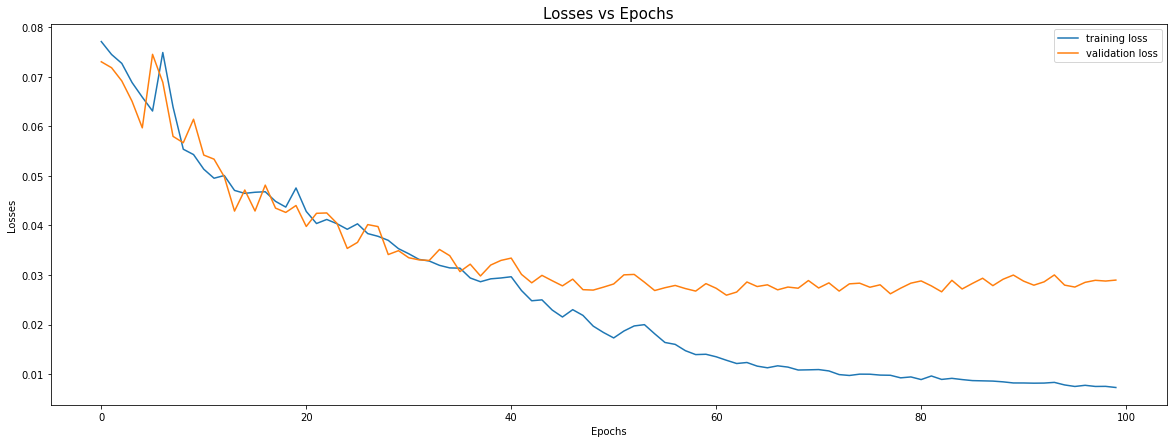

In [23]:
# model performance
plt.figure(figsize = (20,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss', 'validation loss'])
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title('Losses vs Epochs', fontsize = 15)

In [24]:
from keras.models import load_model
model = load_model('./cancer_image_model.h5')

In [25]:
y_pred = model.predict(X_test)


5/5 [==============================] - 20s 4s/step


In [26]:
print(y_pred.shape)


(156, 128, 128, 1)


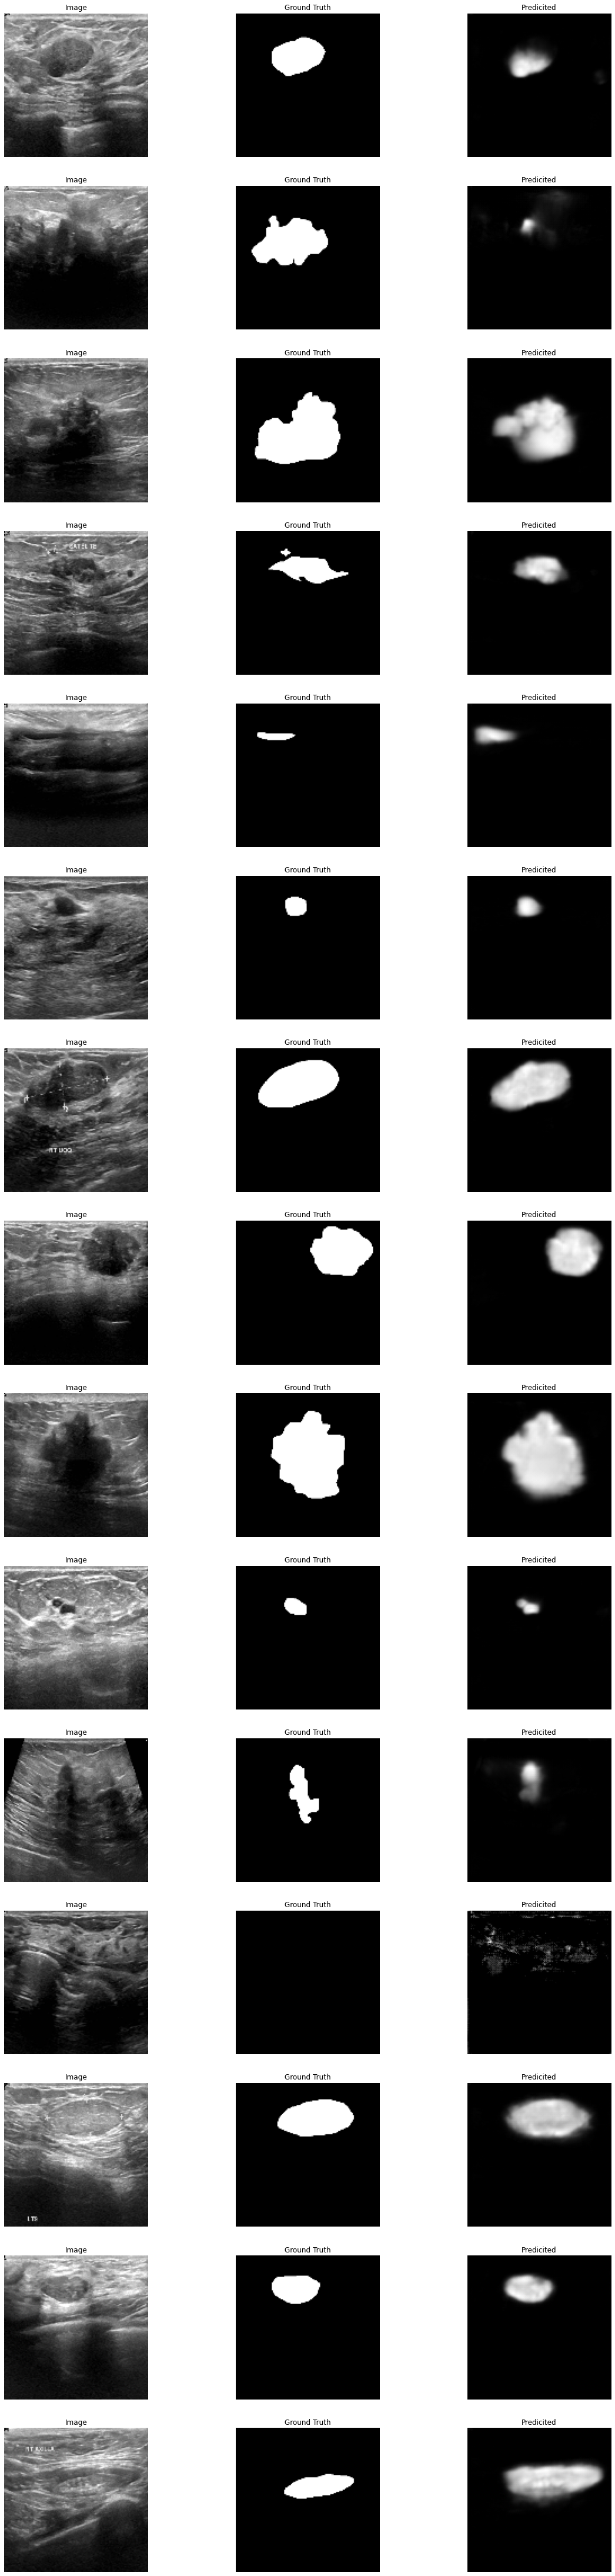

In [27]:
plt.figure(figsize = (20,80))

i = 0
x = 0
while i < 45 :
    
    plt.subplot(15,3,i+1)
    plt.imshow(X_test[x], 'gray')
    plt.title('Image')
    plt.axis('off')
    
    plt.subplot(15,3,i+2)
    plt.imshow(y_test[x], 'gray')
    plt.title('Ground Truth')
    plt.axis('off')
    
    plt.subplot(15,3,i+3)
    plt.imshow(y_pred[x], 'gray')
    plt.title('Predicited')
    plt.axis('off')
    
    x += 1
    i += 3
plt.show()

In [28]:
info = [
    'benign'   ,  # 0
    'normal'   ,  # 1
    'malignant',  # 2
]

In [29]:
X = []
y = []

label_num = -1

for label_class in os.listdir(path) :
    
    new_path   = path + label_class
    label_num += 1
    
    for img in os.listdir(new_path) :
        if 'mask' not in img :
            
            y.append(label_num)
            x = cv2.imread(path + label_class +'/'+img, cv2.IMREAD_GRAYSCALE)
            X.append(img_to_array(Image.fromarray(cv2.resize(x, (128,128)))))

In [63]:
X = np.array(X)/255
y = np.array(y)


In [33]:
y = to_categorical(y)


In [34]:
print(X.shape)
print(y.shape)

(780, 128, 128, 1)
(780, 6)


In [35]:
print(X.min())
print(X.max())

0.0
1.0


(-0.5, 127.5, 127.5, -0.5)

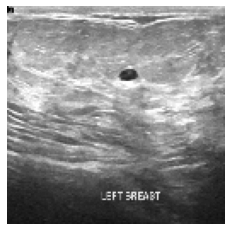

In [36]:
plt.imshow(X[0], 'gray')
plt.axis('off')

In [37]:
from keras.models import load_model


In [38]:
localize = load_model('./cancer_image_model.h5')


In [39]:
M = localize.predict(X)


25/25 [==============================] - 96s 4s/step


0.0
1.2532191


(-0.5, 127.5, 127.5, -0.5)

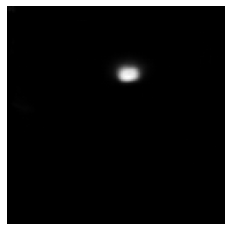

In [40]:
print(M.min())
print(M.max())

plt.imshow(M[0], 'gray')
plt.axis('off')

In [41]:
import pandas
import seaborn

In [ ]:
seaborn.histplot(data = pandas.DataFrame({'id' : [info[p] for p in np.argmax(y, axis = 1)]}), x = 'id')
plt.title('Distribution of classes accross the entire dataset', fontsize = 15)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(M, y, test_size = 0.1, shuffle = True, random_state = 1)

In [45]:
print(X_train.shape)
print(y_train.shape)

(702, 128, 128, 1)
(702, 6)


In [46]:
print(X_test.shape)
print(y_test.shape)

(78, 128, 128, 1)
(78, 6)
